<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-02-05 13:46:52.487030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 13:46:52.789027: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-05 13:46:52.842755: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 13:46:52.842777: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

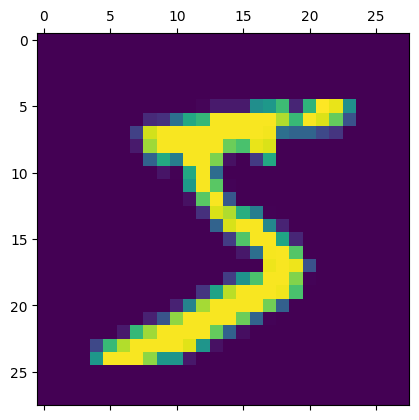

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-02-05 13:46:56.803038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 13:46:56.803447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 13:46:56.803562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-05 13:46:56.803646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-05 13:46:56.803730: W tensorflow/c

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4732 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9254


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9265


[0.26752620935440063, 0.9265000224113464]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 890us/step


array([2.41535921e-02, 2.32341392e-07, 6.00074567e-02, 9.44369674e-01,
       1.97021267e-03, 1.18635654e-01, 1.48848926e-06, 9.99698341e-01,
       8.54543820e-02, 5.83747864e-01], dtype=float32)

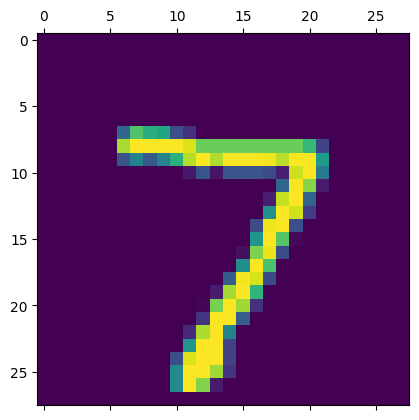

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    8,    1,    1,    0],
       [   0, 1106,    3,    2,    0,    1,    4,    2,   17,    0],
       [   4,    4,  938,   13,    8,    2,   12,    9,   39,    3],
       [   2,    0,   25,  917,    0,   22,    2,   10,   24,    8],
       [   1,    1,    5,    1,  919,    0,   10,    4,   10,   31],
       [  10,    1,    4,   33,   10,  773,   17,    5,   32,    7],
       [  12,    3,    7,    1,    7,    8,  916,    2,    2,    0],
       [   1,    5,   25,    6,    9,    1,    0,  945,    3,   33],
       [   8,    6,    7,   18,    9,   24,   10,   10,  877,    5],
       [  11,    5,    1,   10,   32,    8,    0,   20,    9,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

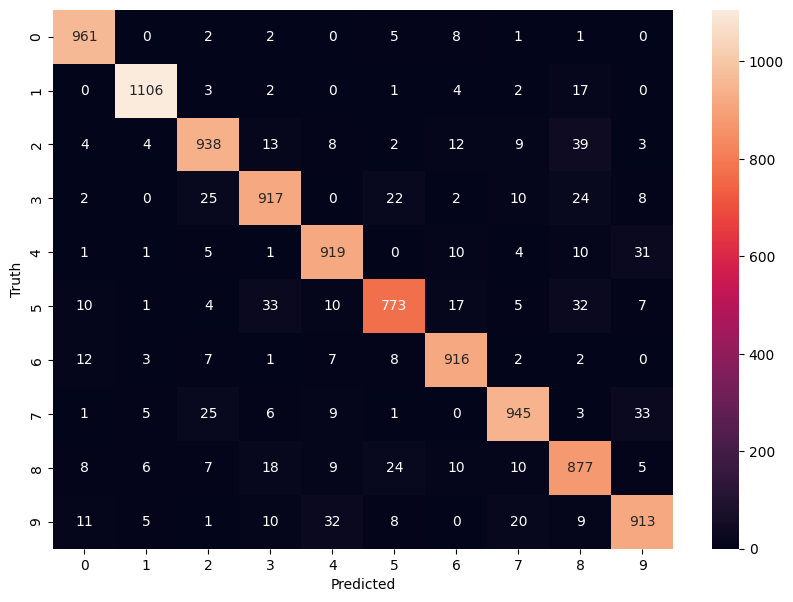

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2686 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1199 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9850


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9767


[0.07421470433473587, 0.9767000079154968]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

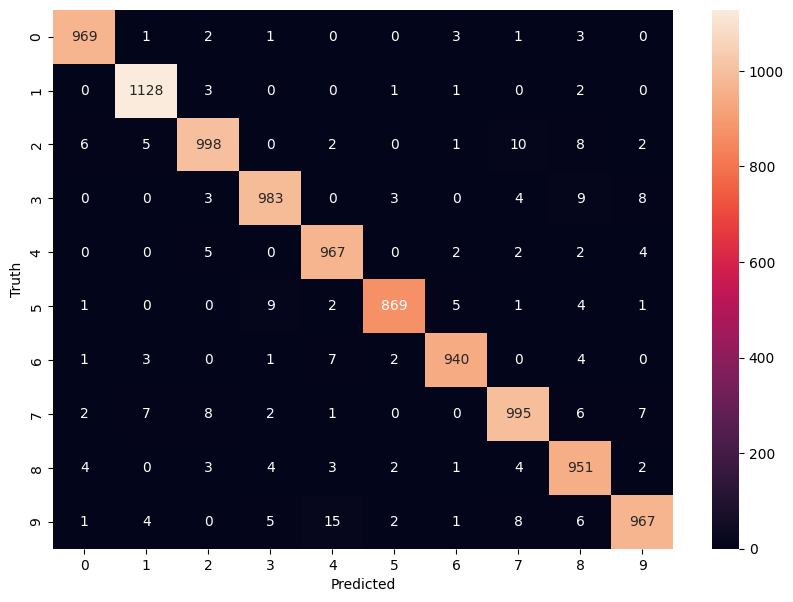

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2683 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1175 - accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0825 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9765


[0.09038922190666199, 0.9764999747276306]